This notebook documents featured solution approaches to the Ship Collision Problem from Round 2 of the Codathon.

The problem admits an idealized reference solution, which is outlined to establish the expected physical behavior and limiting-case dynamics. In addition, a numerical solution developed by Satyamesh is presented, which comes closest to the ideal solution in both formulation and outcome.

## Ideal Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# masses
m1 = 100.0 # ship
m2 = 1.0 # boat


# initial velocities
v1 = 1.0 # ship moving toward wall
v2 = 0.0 # boat at rest


# coefficient of restitution (1 = elastic)
e = 1.0

In [3]:
v1_hist = []
v2_hist = []

collision_count = 0


while True:
    # ship hits boat
    u1, u2 = v1, v2


    v1 = ((m1 - e*m2)*u1 + (1+e)*m2*u2) / (m1 + m2)
    v2 = ((m2 - e*m1)*u2 + (1+e)*m1*u1) / (m1 + m2)


    collision_count += 1
    v1_hist.append(v1)
    v2_hist.append(v2)


    # boat hits wall
    v2 = -e * v2
    collision_count += 1
    v1_hist.append(v1)
    v2_hist.append(v2)


    # stopping condition
    if v1 < 0 and abs(v1) > abs(v2):
        break

Total collisions: 32
Final velocities:
Ship: -0.998857595563118
Boat: 0.47786020820588687


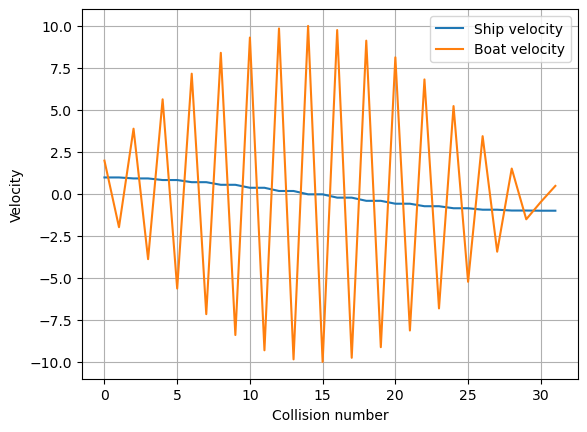

In [4]:
print("Total collisions:", collision_count)
print("Final velocities:")
print("Ship:", v1)
print("Boat:", v2)


plt.plot(v1_hist, label="Ship velocity")
plt.plot(v2_hist, label="Boat velocity")
plt.xlabel("Collision number")
plt.ylabel("Velocity")
plt.legend()
plt.grid(True)
plt.show()

## Satyamesh's Solution

In [5]:
import math
# 1- is of small boat which is a the shore which is initially at rest 
# 2- is of  ship which is moving doing to find at some constant speed u2
def Collide(m1,m2,u1,u2,CollisionCount):
    # this formula are derived from the conservation of energy and conservation of momentum
    e = 1
    v1 = ((m1 - e*m2)*u1 + (1+e)*m2*u2) / (m1 + m2)
    v2 = ((m2 - e*m1)*u2 + (1+e)*m1*u1) / (m1 + m2)

    # it will reverse the direction once it collide with a shore
    v1 = -v1

    if(v2<0 and v2*v2>v1*v1):
        print("No of collision:",CollisionCount)
        print("Final Velocity of Boat:",v1)
        print("Final Velocity of Ship:",v2)
        return
    else:
        CollisionCount+=1
        Collide(m1,m2,v1,v2,CollisionCount)


Collide(1,1000,0,10, 0)


# the above formula of v1 and v2 are wrong for that reason this code is not working I can't recall them



No of collision: 49
Final Velocity of Boat: 6.207641191379149
Final Velocity of Ship: -9.998073073889737
